# Transfer Learning com TensorFlow

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
import requests

In [25]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
file_name = 'cats-and-dogs.zip'
os.makedirs('tmp', exist_ok=True)
path_to_zip = os.path.join('tmp', file_name)

if not os.path.exists(path_to_zip):
    print('Downloading...')
    r = requests.get(url)
    if r.status_code == 200:
        with open(path_to_zip, 'wb') as f:
            f.write(r.content)
        print('Download complete')
    else:
        print(f'Download failed with status code {r.status_code}')
else:
    print('File already exists')

File already exists


In [26]:
# Extraindo o arquivo
if not os.path.exists('tmp/cats_and_dogs_filtered'):
    print('Extracting...')
    with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
        zip_ref.extractall('tmp')

    print('Extraction complete')
else:
    print('Nothing to extract')

Nothing to extract


In [75]:
# Definindo os diretórios
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [76]:
model = tf.keras.models.Sequential([
    Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [77]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [78]:
train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

In [79]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=250, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=250, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [80]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=100, validation_data=validation_generator, validation_steps=50, verbose=1)

/usr/local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
  8/100 ━━━━━━━━━━━━━━━━━━━━ 1:43 1s/step - acc: 0.5013 - loss: 1.8887

/usr/local/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - acc: 0.5042 - loss: 1.4686 - val_acc: 0.5000 - val_loss: 0.6949
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - acc: 0.5324 - loss: 0.6885 - val_acc: 0.6100 - val_loss: 0.6809
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - acc: 0.5769 - loss: 0.6794 - val_acc: 0.5970 - val_loss: 0.6629
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - acc: 0.5425 - loss: 0.6947 - val_acc: 0.6170 - val_loss: 0.6755
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - acc: 0.5972 - loss: 0.6705 - val_acc: 0.5690 - val_loss: 0.6754
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - acc: 0.6082 - loss: 0.6758 - val_acc: 0.5070 - val_loss: 0.6842
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - acc: 0.6296 - loss: 0.6553 - val_acc: 0.6130 - val_loss: 0.6583
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - acc: 0.6643 - loss: 0.6261 - val_acc: 0.6720 - val_loss: 0.6057
Epoch 9/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

ModuleNotFoundError: No module named 'display'

In [84]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

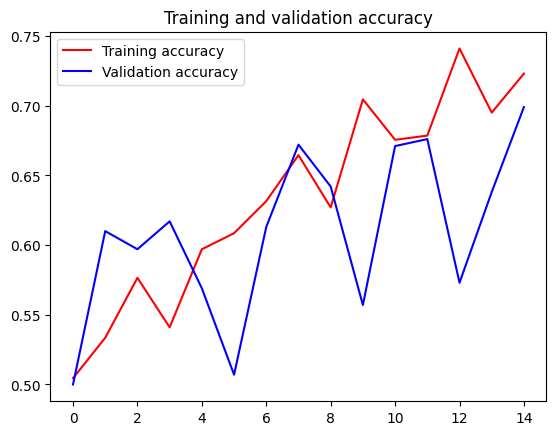

<Figure size 640x480 with 0 Axes>

In [85]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

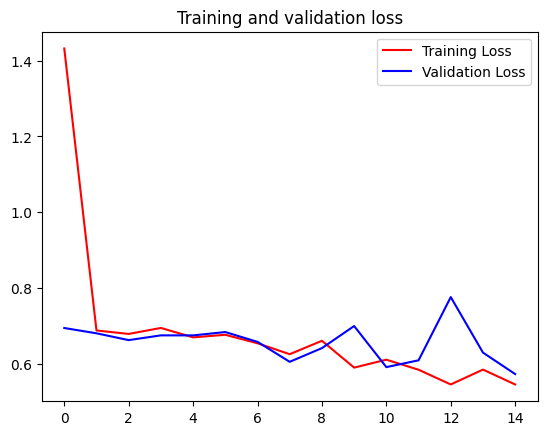

<Figure size 640x480 with 0 Axes>

In [86]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [95]:
gato = Image.open('img/gato.jpg')
cachorro = Image.open('img/cachorro.jpg')

In [96]:
width_gato, height_gato = gato.size
width_cachorro, height_cachorro = cachorro.size

In [98]:
print(f'Gato: {width_gato}x{height_gato}')
print(f'Cachorro: {width_cachorro}x{height_cachorro}')

Gato: 3452x5178
Cachorro: 4710x7064


In [104]:
np_gato = np.array(gato.getdata()).reshape(height_gato, width_gato, 3).astype(np.uint8)

In [105]:
np_cachorro = np.array(cachorro.getdata()).reshape(height_cachorro, width_cachorro, 3).astype(np.uint8)

In [109]:
# Redimensionando as imagens
gato_resized = gato.resize((150, 150))
cachorro_resized = cachorro.resize((150, 150))

In [110]:
np_gato_resized = np.array(gato_resized.getdata()).reshape(150, 150, 3).astype(np.uint8)
np_cachorro_resized = np.array(cachorro_resized.getdata()).reshape(150, 150, 3).astype(np.uint8)

In [111]:
np_gato_resized = np_gato_resized / 255.0
np_cachorro_resized = np_cachorro_resized / 255.0

In [113]:
np_gato_resized.shape, np_cachorro_resized.shape

((150, 150, 3), (150, 150, 3))

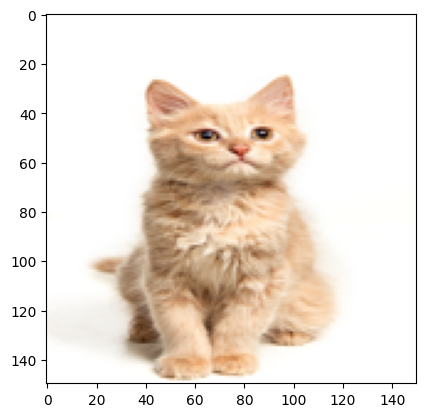

In [114]:
# mostrando as imagens
plt.imshow(np_gato_resized)

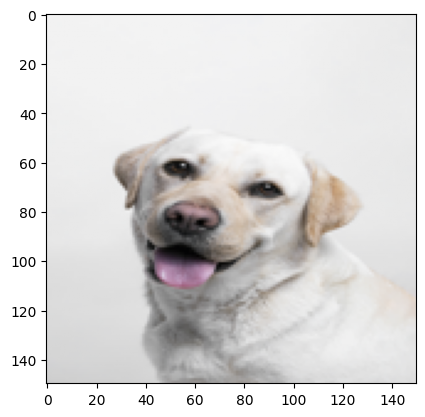

In [115]:
plt.imshow(np_cachorro_resized)

In [120]:
# Resultado da predição
result_gato = model.predict(np_gato_resized.reshape(1, 150, 150, 3))
result_cachorro = model.predict(np_cachorro_resized.reshape(1, 150, 150, 3))

print(f'Gato: {result_gato[0][0]*100:.2f}%')
print(f'Cachorro: {result_cachorro[0][0]*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Gato: 63.46%
Cachorro: 58.65%


In [121]:
gato2 = Image.open('tmp/cats_and_dogs_filtered/validation/cats/cat.2000.jpg')
cachorro2 = Image.open('tmp/cats_and_dogs_filtered/validation/dogs/dog.2000.jpg')

In [123]:
gato2_resized = gato2.resize((150, 150))
cachorro2_resized = cachorro2.resize((150, 150))

np_gato2 = np.array(gato2_resized.getdata()).reshape(150, 150, 3).astype(np.uint8)
np_cachorro2 = np.array(cachorro2_resized.getdata()).reshape(150, 150, 3).astype(np.uint8)

In [124]:
# Redimensionando as imagens
np_gato2 = np_gato2 / 255.0
np_cachorro2 = np_cachorro2 / 255.0

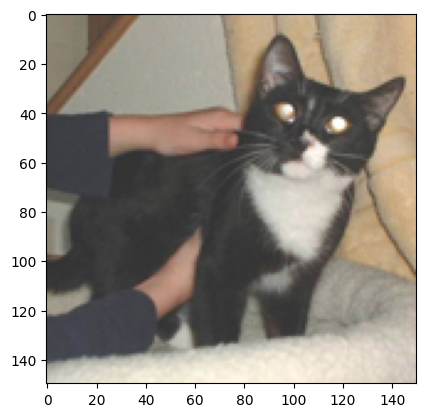

In [125]:
# mostrando as imagens
plt.imshow(np_gato2)

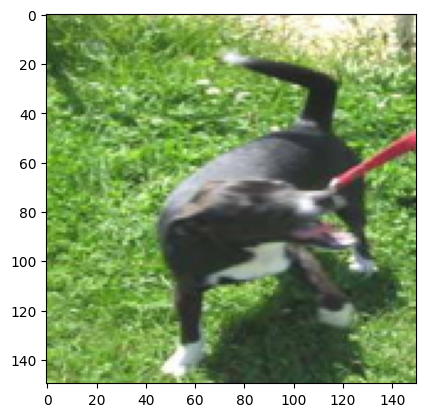

In [126]:
plt.imshow(np_cachorro2)

In [127]:
# Resultado da predição
result_gato2 = model.predict(np_gato2.reshape(1, 150, 150, 3))
result_cachorro2 = model.predict(np_cachorro2.reshape(1, 150, 150, 3))

print(f'Gato: {result_gato2[0][0]*100:.2f}%')
print(f'Cachorro: {result_cachorro2[0][0]*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Gato: 34.34%
Cachorro: 97.24%
